In [3]:
import tempfile

from io import BytesIO
from urllib import request
from zipfile import ZipFile

import matplotlib
import pandas as pd

from cartopy import crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from matplotlib import pyplot as plt


plt.rcParams['figure.figsize'] = [20, 10]

ModuleNotFoundError: No module named 'cartopy'

In [4]:
mapamundi = plt.subplot(121, projection=ccrs.PlateCarree())
mapamundi.coastlines()
mapamundi.stock_img()

mercator = plt.subplot(122, projection=ccrs.Mercator())
mercator.coastlines();


NameError: name 'plt' is not defined

In [5]:
shapes_file = 'https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_ESP_shp.zip'
try:
    temp_dir = tempfile.gettempdir()
    with request.urlopen(shapes_file) as shapes_zip, ZipFile(BytesIO(shapes_zip.read())) as download:
        shapefiles = [download.extract(f, temp_dir)
                     for f in download.namelist()
                      if f.lower().endswith('.shp')]
except (zipfile.BadZipfile, zipfile.LargeZipFile) as exc:
    print('Bad ZIP file: {0}'.format(zip_file))

    
# shapes_file = '/home/fernandezjm/Downloads/Provincias_ETRS89_30N.zip'
# try:
#     temp_dir = tempfile.gettempdir()
#     with open(shapes_file, 'rb') as shapes_zip, ZipFile(BytesIO(shapes_zip.read())) as download:
#         shapefiles = [download.extract(f, temp_dir)
#                      for f in download.namelist()]
# except (zipfile.BadZipfile, zipfile.LargeZipFile) as exc:
#     print('Bad ZIP file: {0}'.format(zip_file))

NameError: name 'zipfile' is not defined

In [43]:
shapefile = [shapefile for shapefile in shapefiles if shapefile.endswith('.shp')][0]

In [48]:
sp.record

['01', b'\xc1lava', 'Araba', '16', b'Pa\xeds Vasco']

In [14]:

import shapefile

rdr =shapefile.Reader('/tmp/Provincias_ETRS89_30N.shp')

In [37]:
sp = list(rdr.iterShapeRecords())
sp2 = list(rdr.iterShapes())[0]

sp.record

['01', b'\xc1lava', 'Araba', '16', b'Pa\xeds Vasco']

In [49]:
marriages = pd.read_csv('http://www.ine.es/jaxi/files/_px/es/csv_sc/t20/e301/provi/03009.csv_sc',
                        sep=';', encoding='utf-8',
                        na_values='..',
                        header=[4, 5], index_col=0)[:-2]
marriages.drop(marriages.columns[-1], axis=1, inplace=True)

meses = marriages.columns.get_level_values(0)[0::5].values.repeat(5)
marriages.columns = pd.MultiIndex.from_tuples(zip(meses, marriages.columns.get_level_values(1)))
provincias = ['Cantabria', 'Madrid', 'Murcia', 'León', 'Albacete']
marriages.Total.loc[provincias].plot.bar(stacked=True, table=True)

In [65]:
prov_index = list(map(lambda t: t.split('/')[0].split(',')[0], list(marriages.index)))

In [120]:
dataset_prov_names = list(map(lambda t: t.split('/')[0].split(' ')[0], list(marriages.index)))

for sp in rdr.iterShapeRecords():
    prov_names = sp.record[1:3]
    for (i, prov_name) in enumerate(prov_names):
        if type(prov_name) is bytes:
            prov_names[i] = prov_name.decode('latin-1')
    for p in prov_names:
        try:
            i = dataset_prov_names.index(p)
            break
#     if any(p for p in prov_names in dataset_prov_names)
#     print(prov_names, any(prov.split(' ')[-1] in dataset_prov_names for prov in prov_names))
# prov_index
# records = [sp.record for sp in rdr.iterShapeRecords()]
# [r.decode('latin-1') for record in records for r in record if type(r) == bytes][0::2]
# dataset_prov_names
#     for prov_name in prov_names:
#         print(prov_name.split(' ')[-1], prov_name.split(' ')[-1] in dataset_prov_names)
dataset_prov_names.index('Araeba')

ValueError: 'Álava' is not in list

In [104]:
any(prov in dataset_prov_names for prov in prov_names)

True

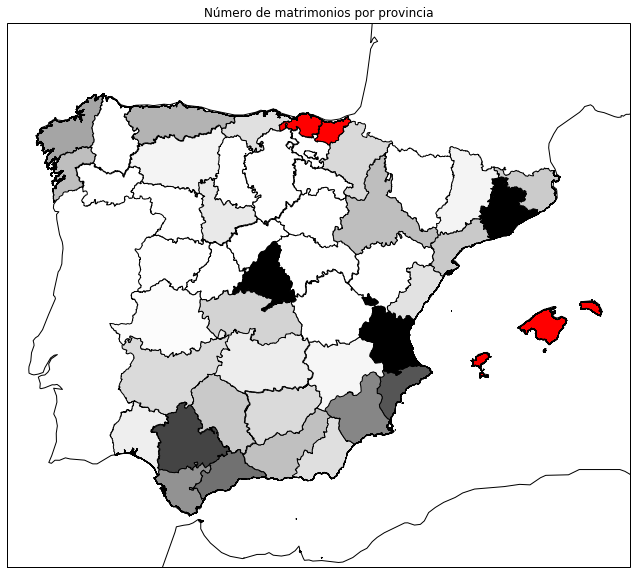

In [370]:
iberia = plt.axes(projection=ccrs.GOOGLE_MERCATOR)
iberia.coastlines(resolution='50m')

iberia.set_extent([-10, 5, 35, 45])


norm = matplotlib.colors.Normalize(vmin=marriages.Total.min(), vmax=marriages.Total.max())
cmap=plt.cm.gray_r

for province in Reader(shapefile).iterShapeRecords():
    province_name = province.attributes['NAME_2'].split(' ')[-1]
    marriage_record = marriages.iloc[:, 0].str.contains(province_name)
    
    if any(marriage_record):
        facecolor = cmap(norm(float(marriages.Total[marriage_record])))
    else:
        facecolor = 'red'  # no data
    
    shape = ShapelyFeature(province.geometry,
                           ccrs.PlateCarree(),
                           facecolor=facecolor,
                           edgecolor='black')
    iberia.add_feature(shape)

plt.title('Número de matrimonios por provincia');